## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameter
bitstamp = pd.read_csv(
    Path('../Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [3]:
### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2019-01-07 23:55:00,3977.81,3977.81,3977.81,$3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:56:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2019-01-07 23:57:00,3977.81,3984.40,3977.81,$3984.4,8.907403,35464.870894,3981.504964
2019-01-07 23:58:00,3980.97,3980.97,3980.97,$3980.97,1.615929,6432.963358,3980.970000
2019-01-07 23:59:00,3979.07,3983.52,3979.07,$3983.52,1.920004,7643.937878,3981.209496


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('../Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,$432.52,4.117318,1776.650476,431.506725
...,...,...,...,...,...,...,...
2019-01-07 23:54:00,3980.50,3981.00,3980.22,$3980.33,8.043889,32017.759767,3980.383250
2019-01-07 23:55:00,3977.81,3977.81,3977.81,$3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:57:00,3977.81,3984.40,3977.81,$3984.4,8.907403,35464.870894,3981.504964


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace('$', '')


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Convert the Close data type to a flo
bitstamp['Close'] = bitstamp['Close'].astype(float)
bitstamp['Close']

Timestamp
2015-12-31 19:01:00     430.89
2015-12-31 19:02:00     430.89
2015-12-31 19:04:00     431.06
2015-12-31 19:05:00     430.54
2015-12-31 19:06:00     432.52
                        ...   
2019-01-07 23:54:00    3980.33
2019-01-07 23:55:00    3977.81
2019-01-07 23:57:00    3984.40
2019-01-07 23:58:00    3980.97
2019-01-07 23:59:00    3983.52
Name: Close, Length: 1350419, dtype: float64

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [10]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

2647

In [11]:
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001
...,...,...,...,...,...,...,...
2019-01-07 17:02:00,4006.01,4006.57,4006.00,$4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,$4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,$4006.01,1.192123,4775.647308,4006.003635


In [13]:
coinbase['Close'] = coinbase['Close'].str.replace('$', '')

In [14]:
coinbase['Close'] = coinbase['Close'].astype(float)
coinbase['Close']

Timestamp
2015-12-31 19:01:00     430.40
2015-12-31 19:02:00     430.40
2015-12-31 19:03:00     430.36
2015-12-31 19:04:00     430.39
2015-12-31 19:05:00     430.96
                        ...   
2019-01-07 17:02:00    4006.01
2019-01-07 17:03:00    4006.01
2019-01-07 17:04:00    4006.01
2019-01-07 17:05:00    4005.50
2019-01-07 17:06:00    4005.99
Name: Close, Length: 1550147, dtype: float64

In [15]:
coinbase.duplicated().sum()

624

In [16]:
coinbase = coinbase.drop_duplicates()
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [17]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()


Timestamp
2015-12-31 19:01:00    430.89
2015-12-31 19:02:00    430.89
2015-12-31 19:04:00    431.06
2015-12-31 19:05:00    430.54
2015-12-31 19:06:00    432.52
Name: Close, dtype: float64

In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, 'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()


Timestamp
2015-12-31 19:01:00    430.40
2015-12-31 19:02:00    430.40
2015-12-31 19:03:00    430.36
2015-12-31 19:04:00    430.39
2015-12-31 19:05:00    430.96
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [19]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,1.347772e+06,1.347772e+06,1.347772e+06,1.347772e+06,1.347772e+06,1.347772e+06,1.347772e+06
mean,4.503959e+03,4.507642e+03,4.499786e+03,4.503924e+03,7.911510e+00,3.991326e+04,4.503678e+03
std,3.956188e+03,3.960719e+03,3.950903e+03,3.956149e+03,1.986799e+01,1.171926e+05,3.955833e+03
min,3.525600e+02,3.536400e+02,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.521493e+02
25%,7.889100e+02,7.889900e+02,7.888000e+02,7.888900e+02,3.833169e-01,6.268523e+02,7.888853e+02
50%,3.788730e+03,3.791430e+03,3.786030e+03,3.788990e+03,2.013215e+00,5.779344e+03,3.788660e+03
75%,6.929362e+03,6.933483e+03,6.924840e+03,6.929443e+03,7.462753e+00,3.017330e+04,6.929208e+03
max,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,1.616060e+03,5.483271e+06,1.966330e+04


In [20]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,1.549523e+06,1.549523e+06,1.549523e+06,1.549523e+06,1.549523e+06,1.549523e+06,1.549523e+06
mean,4.091927e+03,4.093727e+03,4.089974e+03,4.091926e+03,8.166907e+00,4.568889e+04,4.091847e+03
std,3.913505e+03,3.915935e+03,3.910917e+03,3.913501e+03,1.837862e+01,1.575088e+05,3.913428e+03
min,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,4.255500e-06,6.000000e-02
25%,6.754400e+02,6.756200e+02,6.751600e+02,6.754000e+02,1.004880e+00,1.330350e+03,6.753913e+02
50%,2.710690e+03,2.711700e+03,2.709970e+03,2.710730e+03,2.914855e+00,7.273329e+03,2.710628e+03
75%,6.593500e+03,6.595000e+03,6.591805e+03,6.593500e+03,8.061827e+00,2.972588e+04,6.593470e+03
max,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.156319e+03,1.997076e+07,1.989199e+04


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

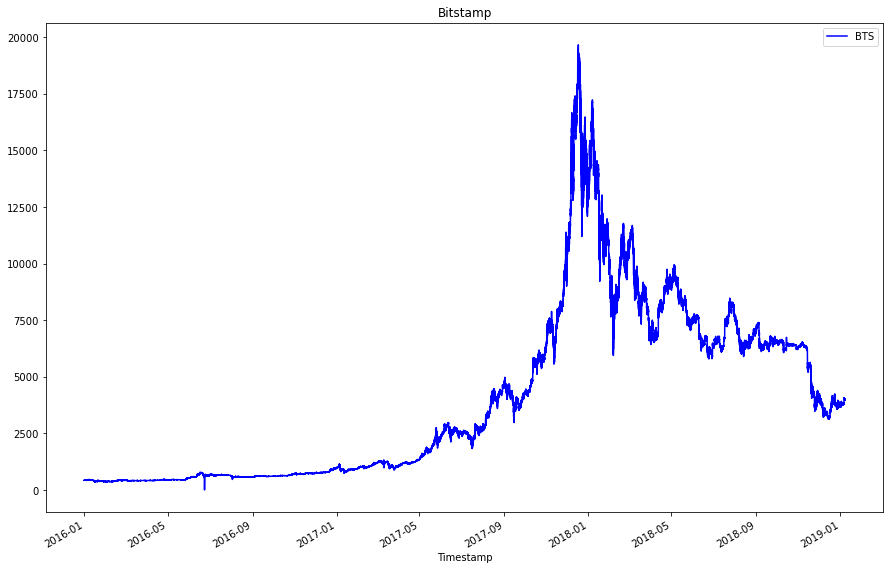

In [21]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Close'].plot(legend=True, figsize=(15,10), title="Bitstamp", color="blue", label="BTS")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

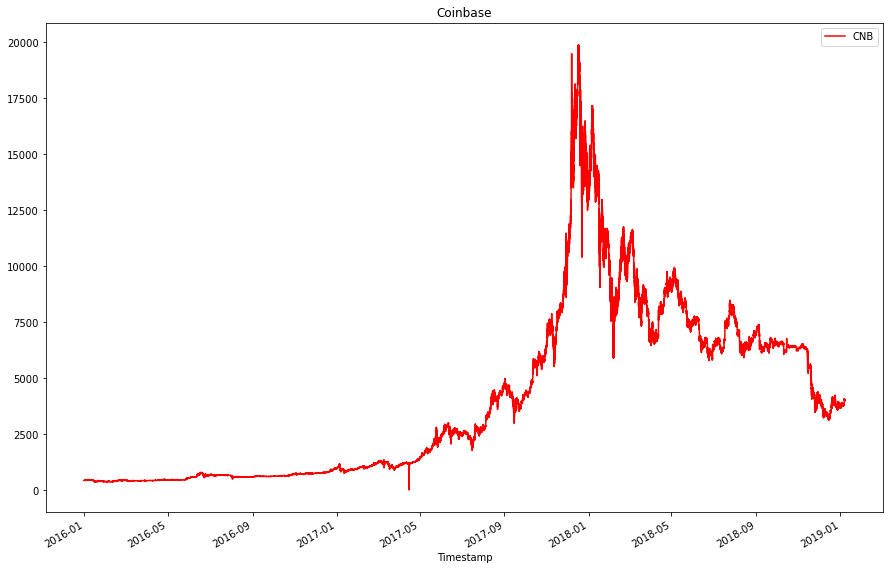

In [22]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Close'].plot(legend=True, figsize=(15,10), title="Coinbase", color="red", label="CNB")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

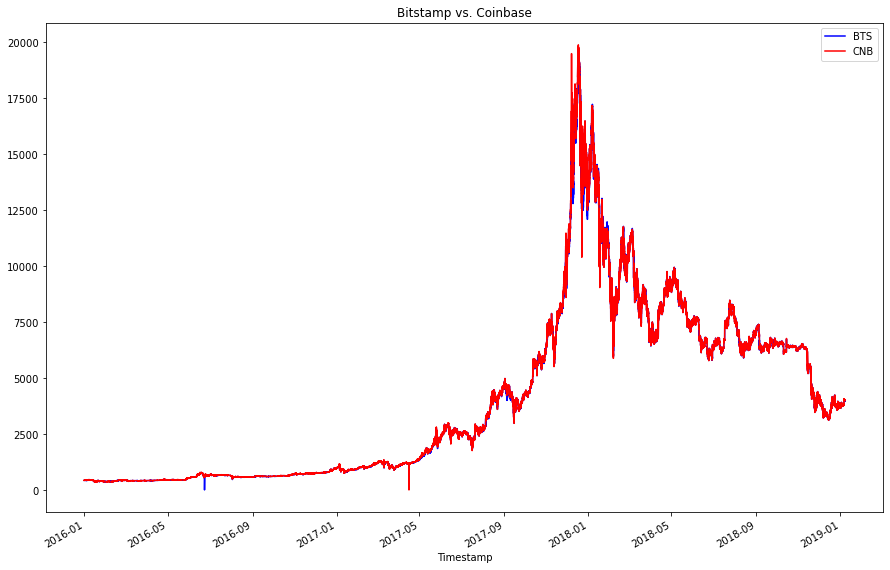

In [23]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase", color="blue", label="BTS")
coinbase['Close'].plot(legend=True, figsize=(15, 10), color="red", label="CNB")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase July 2016'}, xlabel='Timestamp'>

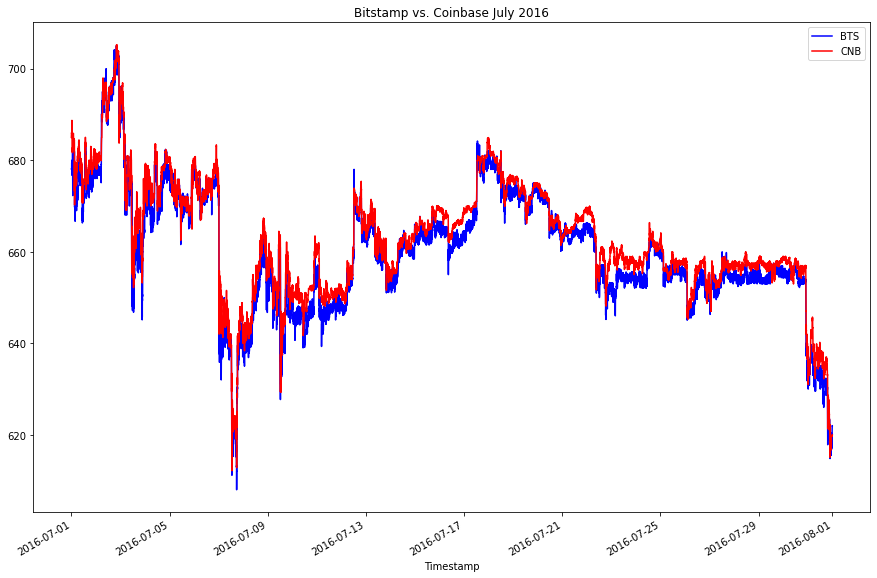

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2016-07-01' : '2016-07-31'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase July 2016", color="blue", label="BTS")
coinbase['Close'].loc['2016-07-01' : '2016-07-31'].plot(legend=True, figsize=(15, 10), color="red", label="CNB")


<AxesSubplot:title={'center':'Bitstamp vs. Coinbase September 2018'}, xlabel='Timestamp'>

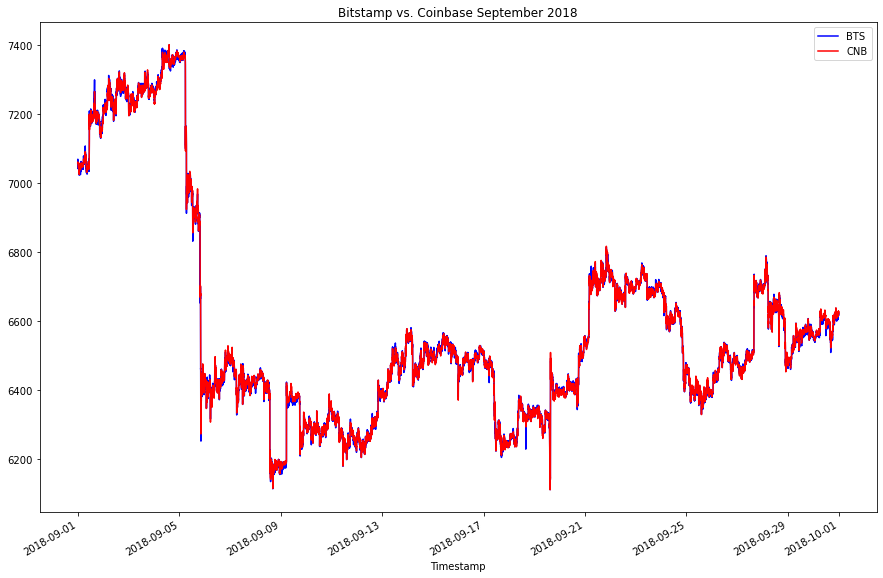

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-09-01' : '2018-09-30'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase September 2018", color="blue", label="BTS")
coinbase['Close'].loc['2018-09-01' : '2018-09-30'].plot(legend=True, figsize=(15, 10), color="red", label="CNB")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The degree of spread has changed significantly from the time period in 2016, to the time period in 2018. There are clearly fewer arbitrage opportunities to exploit over time. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase July 17th 2016'}, xlabel='Timestamp'>

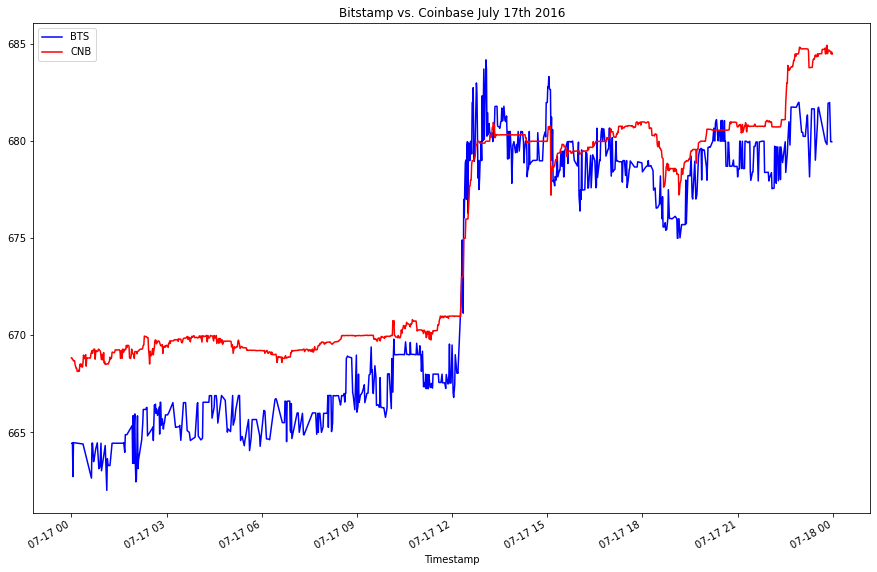

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2016-07-17'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase July 17th 2016", color="blue", label="BTS")
coinbase['Close'].loc['2016-07-17'].plot(legend=True, figsize=(15, 10), color="red", label="CNB")

In [27]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase['Close'].loc['2016-07-17'] - bitstamp['Close'].loc['2016-07-17']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()


count    727.000000
mean       1.894897
std        1.904377
min       -4.200000
25%        0.790000
50%        2.080000
75%        3.230000
max        6.710000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread July 17 2016'}>

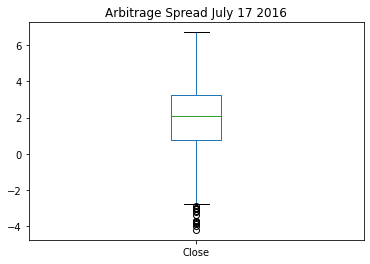

In [28]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_early.plot(kind="box", title="Arbitrage Spread July 17 2016")


<AxesSubplot:title={'center':'Bitstamp vs. Coinbase September 17 2017'}, xlabel='Timestamp'>

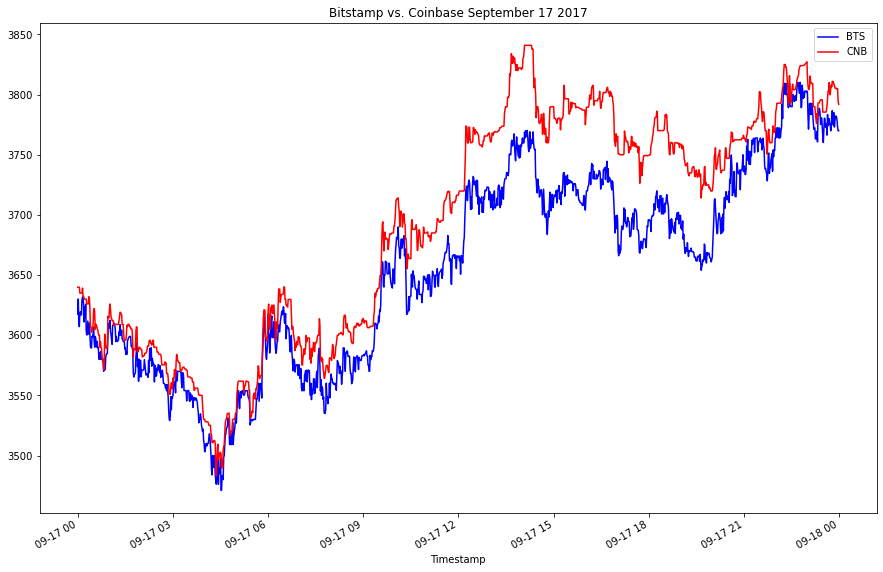

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2017-09-17'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase September 17 2017", color="blue", label="BTS")
coinbase['Close'].loc['2017-09-17'].plot(legend=True, figsize=(15, 10), color="red", label="CNB")

In [30]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase['Close'].loc['2017-09-17'] - bitstamp['Close'].loc['2017-09-17']



# Generate summary statistics for the middle DataFrame
arbitrage_spread_middle.describe()


count    1412.000000
mean       36.263109
std        22.664611
min        -1.700000
25%        17.087500
50%        30.045000
75%        58.152500
max        88.360000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread September 2017'}>

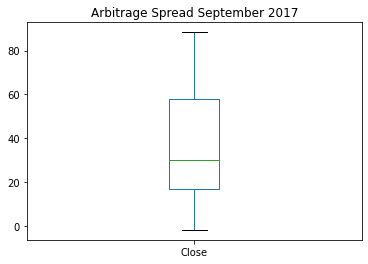

In [31]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_middle.plot(kind="box", title="Arbitrage Spread September 2017")


<AxesSubplot:title={'center':'Bitstamp vs. Coinbase September 17 2018'}, xlabel='Timestamp'>

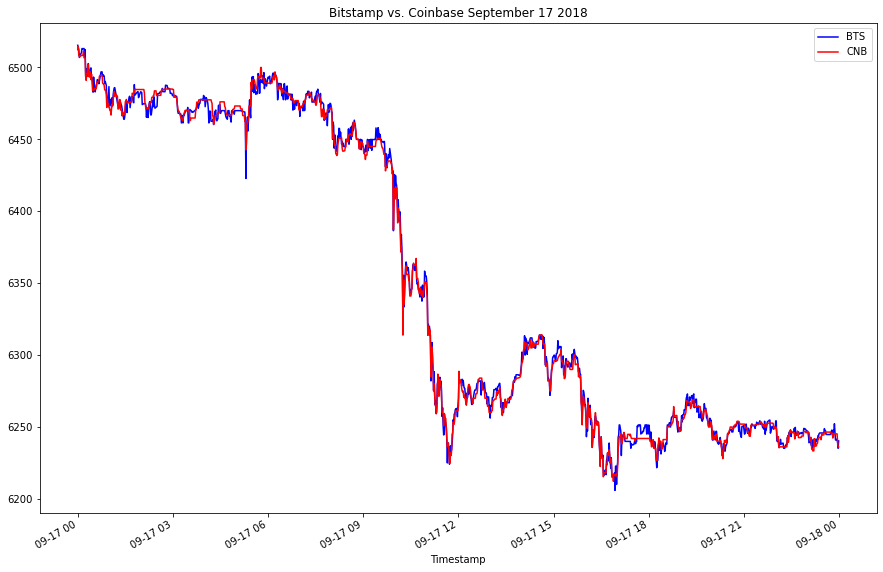

In [32]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-09-17'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase September 17 2018", color="blue", label="BTS")
coinbase['Close'].loc['2018-09-17'].plot(legend=True, figsize=(15, 10), color="red", label="CNB")


In [33]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-09-17'] - coinbase['Close'].loc['2018-09-17']




# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1289.000000
mean        0.631885
std         4.145505
min       -19.900000
25%        -1.890000
50%         0.720000
75%         3.390000
max        14.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread September 17 2018'}>

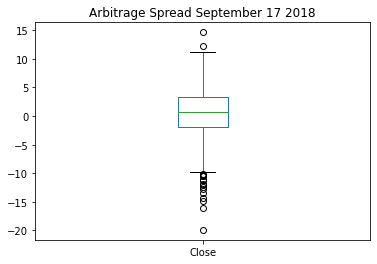

In [34]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_late.plot(kind="box", title="Arbitrage Spread September 17 2018")


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [35]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase['Close'].loc['2016-07-17'] - bitstamp['Close'].loc['2016-07-17']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
arbitrage_spread_early.describe()


count    614.000000
mean       2.464414
std        1.401452
min        0.010000
25%        1.172500
50%        2.475000
75%        3.387500
max        6.710000
Name: Close, dtype: float64

In [36]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase['Close'].loc['2017-09-17'] - bitstamp['Close'].loc['2017-09-17']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
arbitrage_spread_middle.describe()


count    1408.000000
mean       36.369283
std        22.608900
min         0.030000
25%        17.217500
50%        30.110000
75%        58.222500
max        88.360000
Name: Close, dtype: float64

In [37]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp['Close'].loc['2018-09-17'] - coinbase['Close'].loc['2018-09-17']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]
arbitrage_spread_late.describe()


count    736.000000
mean       3.439592
std        2.445682
min        0.010000
25%        1.535000
50%        2.985000
75%        4.855000
max       14.650000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [38]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = arbitrage_spread_early / bitstamp['Close'].loc['2016-07-17']

# Review the spread return DataFrame
spread_return_early.describe()


count    614.000000
mean       0.003675
std        0.002109
min        0.000015
25%        0.001750
50%        0.003667
75%        0.005077
max        0.010129
Name: Close, dtype: float64

In [39]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = arbitrage_spread_middle / bitstamp['Close'].loc['2017-09-17']

# Review the spread return DataFrame
spread_return_middle.describe()

count    1408.000000
mean        0.009885
std         0.006061
min         0.000008
25%         0.004779
50%         0.008366
75%         0.015799
max         0.023546
Name: Close, dtype: float64

In [40]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = arbitrage_spread_late / coinbase['Close'].loc['2018-09-17']

# Review the spread return DataFrame
spread_return_late.describe()

count    736.000000
mean       0.000542
std        0.000386
min        0.000002
25%        0.000242
50%        0.000474
75%        0.000764
max        0.002264
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [41]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()


Timestamp
2016-07-17 02:02:00    0.010129
Name: Close, dtype: float64

In [42]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2017-09-17 06:41:00    0.011115
2017-09-17 06:42:00    0.012169
2017-09-17 06:47:00    0.010170
2017-09-17 07:12:00    0.010663
2017-09-17 07:14:00    0.010244
Name: Close, dtype: float64

In [43]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [44]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1.000000
mean     0.010129
std           NaN
min      0.010129
25%      0.010129
50%      0.010129
75%      0.010129
max      0.010129
Name: Close, dtype: float64

In [45]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()


count    604.000000
mean       0.016099
std        0.003161
min        0.010027
25%        0.013399
50%        0.016480
75%        0.018463
max        0.023546
Name: Close, dtype: float64

In [46]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [47]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2016-07-17']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early


Timestamp
2016-07-17 02:02:00    6.71
Name: Close, dtype: float64

In [48]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2017-09-17']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle


Timestamp
2017-09-17 06:41:00    39.90
2017-09-17 06:42:00    43.64
2017-09-17 06:47:00    36.31
2017-09-17 07:12:00    37.98
2017-09-17 07:14:00    36.48
                       ...  
2017-09-17 20:45:00    47.34
2017-09-17 20:53:00    41.58
2017-09-17 21:29:00    40.79
2017-09-17 21:30:00    40.33
2017-09-17 21:31:00    38.02
Name: Close, Length: 604, dtype: float64

In [49]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase['Close'].loc['2018-09-17']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late


Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [50]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1.00
mean     6.71
std       NaN
min      6.71
25%      6.71
50%      6.71
75%      6.71
max      6.71
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Profits'}, xlabel='Timestamp'>

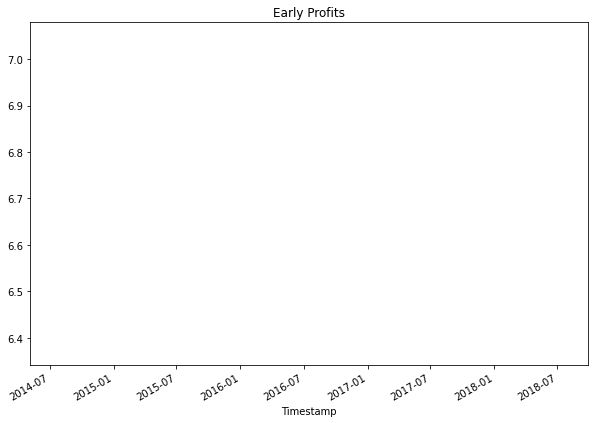

In [51]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(figsize=(10, 7), title="Early Profits")


In [52]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()


count    604.000000
mean      59.565480
std       11.915251
min       35.810000
25%       49.792500
50%       61.340000
75%       68.650000
max       88.360000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Profits'}, xlabel='Timestamp'>

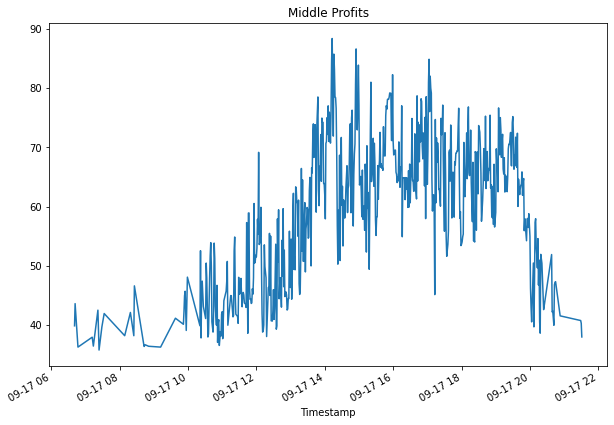

In [53]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_middle.plot(figsize=(10, 7), title="Middle Profits")


In [54]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Profits'}, xlabel='Timestamp'>

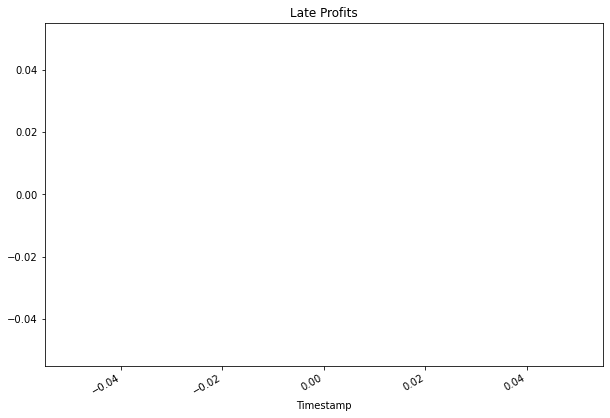

In [55]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_late.plot(figsize=(10, 7), title="Late Profits")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [56]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()


6.709999999999923

In [57]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle.sum()


35977.55

In [58]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()


0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [59]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()


<AxesSubplot:title={'center':'Cumulative Early Profits'}, xlabel='Timestamp'>

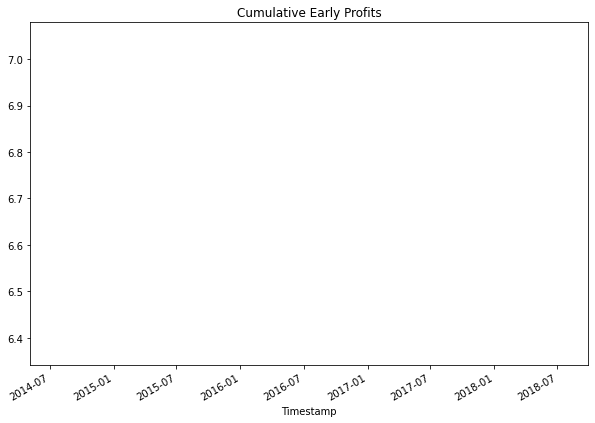

In [60]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Early Profits")

In [61]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()


<AxesSubplot:title={'center':'Cumulative Middle Profits'}, xlabel='Timestamp'>

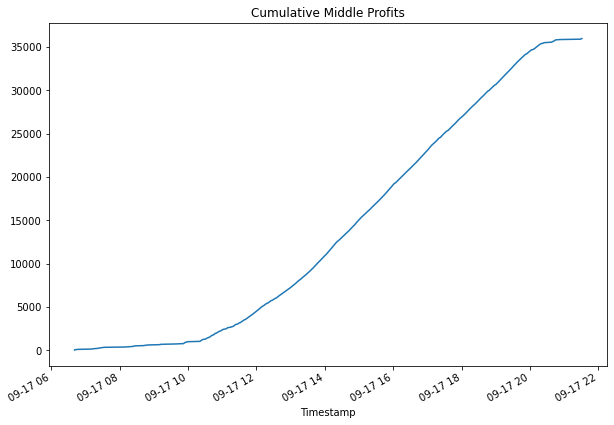

In [62]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Middle Profits")


In [63]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Cumulative Late Profits'}, xlabel='Timestamp'>

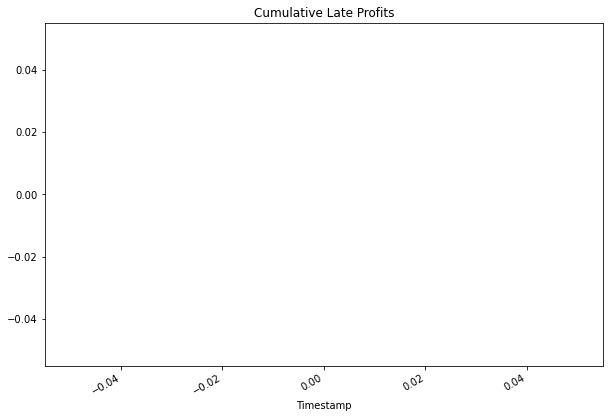

In [64]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Late Profits")


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.